# Playing with the visits table 

### Alex Lu | Autumn Q 17-18  
---

October 22, 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [2]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    return df[bound1:bound2]

In [3]:
path_visits = "visits_data/both_clinics_2018_to_date.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.groupby(df_visits['PatientNumber']).size().describe()

count    729.000000
mean       2.548697
std        1.866610
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       16.000000
dtype: float64

In [4]:
df_visits['PatientNumber'].describe()

count         1858
unique         729
top       N0067052
freq            16
Name: PatientNumber, dtype: object

In [5]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  407.000000
mean    47.592138
std     17.355618
min     18.000000
25%     31.000000
50%     49.000000
75%     63.000000
max     81.000000
        Age(Year)
count  289.000000
mean    50.089965
std     17.855288
min      4.000000
25%     35.000000
50%     54.000000
75%     63.000000
max     95.000000


In [6]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-01-21 09:15:00,AFC,N0064750,66,ARBOR GENERAL VISIT,F,2018-01-21 09:15:00,2018-01-21 09:00:45
2018-01-21 09:30:00,AFC,N0058384,51,ARBOR GENERAL VISIT,M,2018-01-21 09:30:00,2016-11-06 09:14:12
2018-01-21 10:00:00,AFC,N0064743,19,ARBOR GENERAL VISIT,F,2018-01-21 10:00:00,2018-01-21 08:59:30
2018-01-21 10:30:00,AFC,N0014256,67,ARBOR GENERAL VISIT,F,2018-01-21 10:30:00,2012-05-27 09:42:32
2018-01-21 10:45:00,AFC,N0064775,64,ARBOR GENERAL VISIT,F,2018-01-21 10:45:00,2018-01-21 09:25:35


Let's take a look and make sure we're looking at the right stuff

In [7]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [8]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.479115
M    0.407862
U    0.113022
Name: Sex, dtype: float64

In [9]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.529412
M    0.401384
U    0.069204
Name: Sex, dtype: float64

In [10]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(62.1, 68.4]      66
(55.8, 62.1]      56
(17.936, 24.3]    49
(30.6, 36.9]      46
(24.3, 30.6]      42
(43.2, 49.5]      36
(36.9, 43.2]      36
(49.5, 55.8]      33
(68.4, 74.7]      30
(74.7, 81.0]      13
Name: Age(Year), dtype: int64

In [11]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(58.6, 67.7]     67
(49.5, 58.6]     57
(22.2, 31.3]     50
(40.4, 49.5]     31
(67.7, 76.8]     29
(31.3, 40.4]     27
(13.1, 22.2]     12
(76.8, 85.9]     11
(85.9, 95.0]      3
(3.908, 13.1]     2
Name: Age(Year), dtype: int64

In [12]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-05-23 09:30:00,PFC,N0039583,4,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [13]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [14]:
arbor_visits_clean['Sex'].value_counts()

F    195
M    165
U     46
Name: Sex, dtype: int64

In [15]:
pfc_visits_clean['Sex'].value_counts()

F    152
M    116
U     19
Name: Sex, dtype: int64

In [16]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.936999999999998, 25.2]    58
(25.2, 31.4]                  44
(31.4, 37.6]                  37
(37.6, 43.8]                  33
(43.8, 50.0]                  42
(50.0, 56.2]                  36
(56.2, 62.4]                  47
(62.4, 68.6]                  66
(68.6, 74.8]                  30
(74.8, 81.0]                  13
Name: Age(Year), dtype: int64

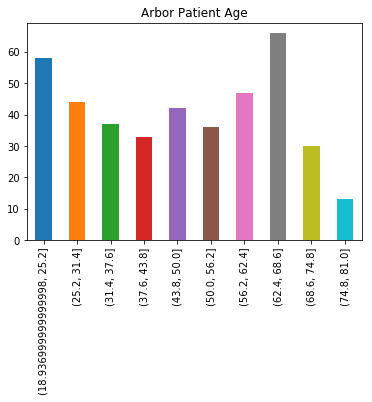

In [17]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [18]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.923, 26.6]    44
(26.6, 34.2]      26
(34.2, 41.8]      22
(41.8, 49.4]      28
(49.4, 57.0]      50
(57.0, 64.6]      57
(64.6, 72.2]      33
(72.2, 79.8]      18
(79.8, 87.4]       7
(87.4, 95.0]       2
Name: Age(Year), dtype: int64

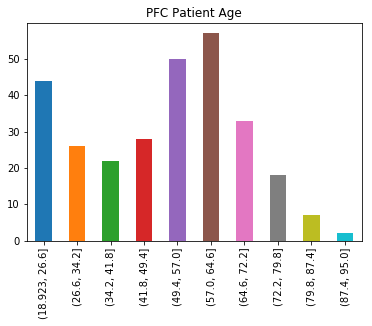

In [19]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [20]:
arbor_visits_clean['Age(Year)'].describe()

count    406.000000
mean      47.665025
std       17.314551
min       19.000000
25%       31.250000
50%       49.000000
75%       63.000000
max       81.000000
Name: Age(Year), dtype: float64

In [21]:
pfc_visits_clean['Age(Year)'].describe()

count    287.000000
mean      50.411150
std       17.495203
min       19.000000
25%       35.000000
50%       54.000000
75%       63.000000
max       95.000000
Name: Age(Year), dtype: float64

In [22]:
arbor_visits_clean['PatientNumber'].describe()

count          406
unique         351
top       N0059372
freq             5
Name: PatientNumber, dtype: object

In [23]:
pfc_visits_clean['PatientNumber'].describe()

count          287
unique         281
top       N0067878
freq             2
Name: PatientNumber, dtype: object

In [24]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    351.000000
mean       1.156695
std        0.448431
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64

In [25]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    281.000000
mean       1.021352
std        0.144814
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [26]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [27]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [28]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


406
[[ 0.  0.  0. 22.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 36.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 51.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 34.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 56.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 41.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 55.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.  0.  0.  0.  0.  0.]]
['1/2018', '2/2018', '3/2018', '4/2018', '5/2018', '6/2018', '7/2018', '8/2018', '9/2018', '10/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,LAB FOLLOW-UP NOTE
1/2018,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
2/2018,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0
3/2018,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0
4/2018,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0
5/2018,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0
6/2018,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
7/2018,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0
8/2018,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0
9/2018,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
10/2018,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0


(0, 18)

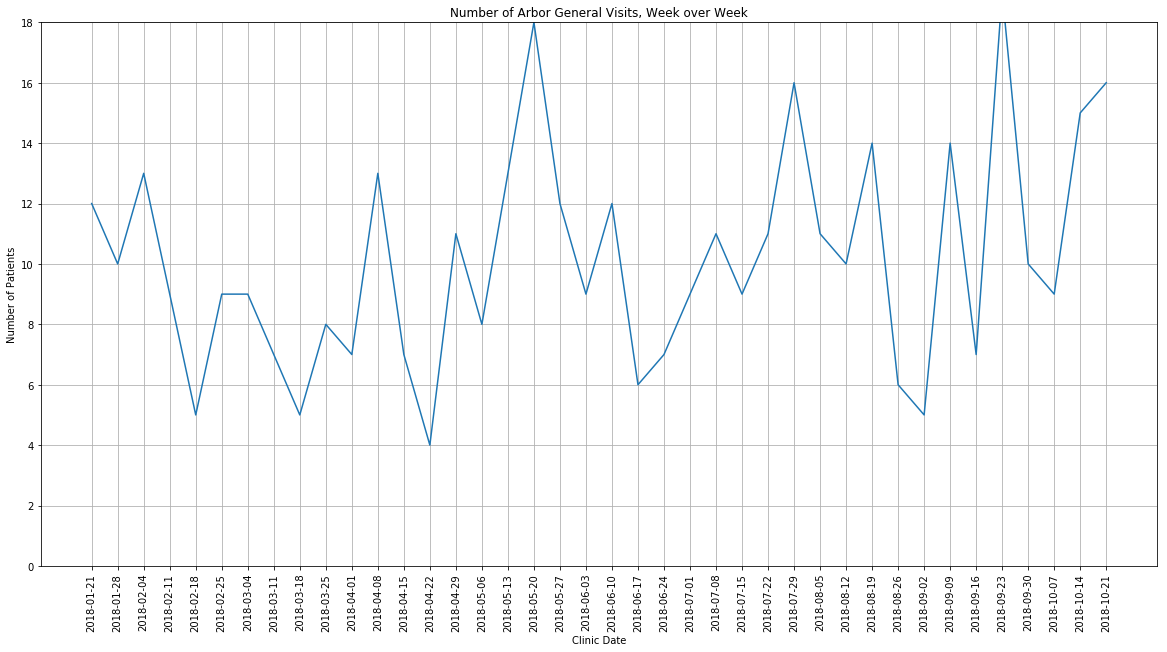

In [29]:
arbor_date_grouped = arbor_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), arbor_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of Arbor General Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

(0, 18)

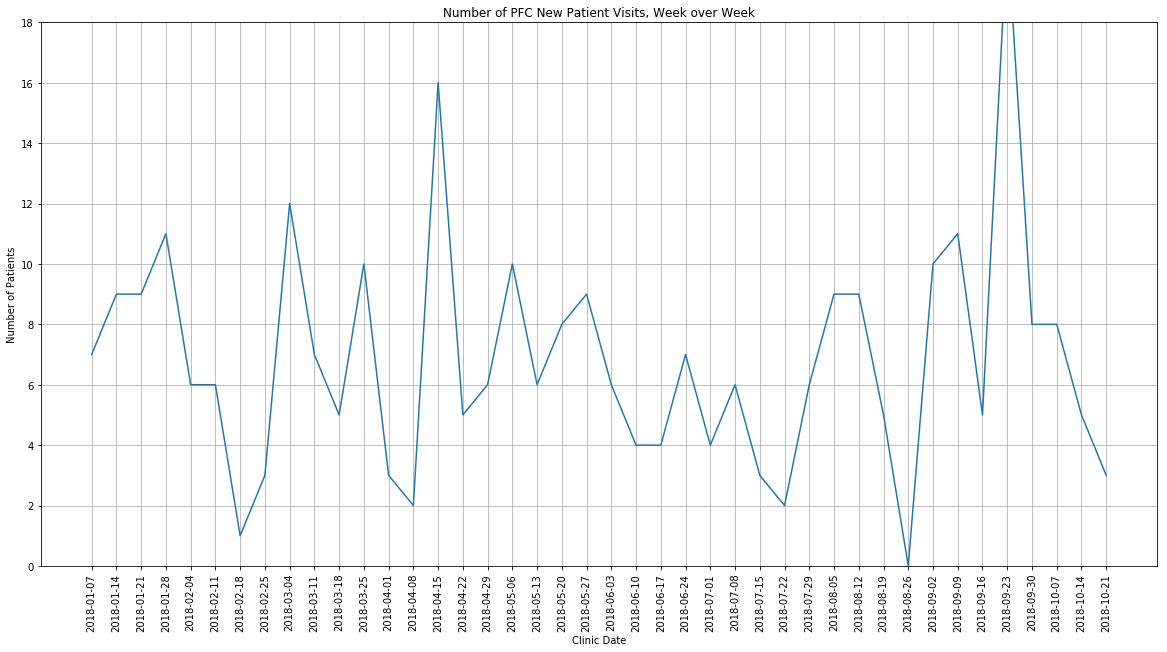

In [30]:
pfc_date_grouped = pfc_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pfc_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), pfc_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of PFC New Patient Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

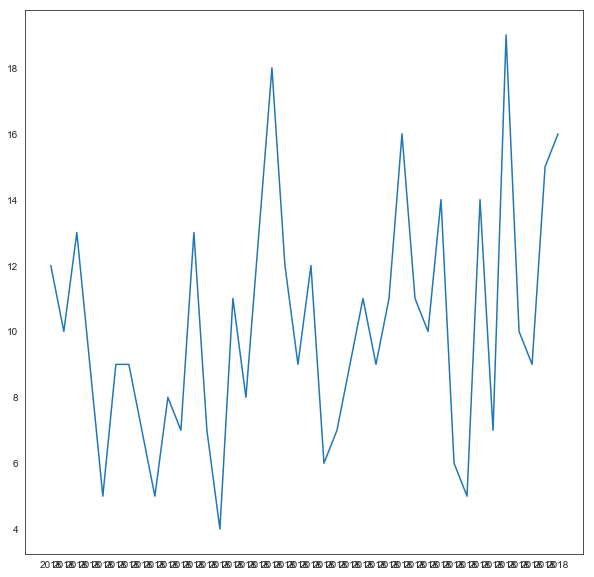

In [31]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=arbor_date_grouped['PatientNumber'].count(), ax=ax)
ax.set_xticks(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'))

In [32]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2018-01-21 02:41:37.499999999, 2018-02-13 03:36:15]    44
(2018-02-13 03:36:15, 2018-03-07 21:57:30]              23
(2018-03-07 21:57:30, 2018-03-30 16:18:45]              20
(2018-03-30 16:18:45, 2018-04-22 10:40:00]              30
(2018-04-22 10:40:00, 2018-05-15 05:01:15]              33
(2018-05-15 05:01:15, 2018-06-06 23:22:30]              39
(2018-06-06 23:22:30, 2018-06-29 17:43:45]              25
(2018-06-29 17:43:45, 2018-07-22 12:05:00]              39
(2018-07-22 12:05:00, 2018-08-14 06:26:15]              38
(2018-08-14 06:26:15, 2018-09-06 00:47:30]              25
(2018-09-06 00:47:30, 2018-09-28 19:08:45]              40
(2018-09-28 19:08:45, 2018-10-21 13:30:00]              50
Name: VisitDateTimeTS, dtype: int64

In [33]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2018-01-06 01:56:40.799999999, 2018-01-30 06:53:20]    36
(2018-01-30 06:53:20, 2018-02-23 04:56:40]              13
(2018-02-23 04:56:40, 2018-03-19 03:00:00]              27
(2018-03-19 03:00:00, 2018-04-12 01:03:20]              15
(2018-04-12 01:03:20, 2018-05-05 23:06:40]              37
(2018-05-05 23:06:40, 2018-05-29 21:10:00]              23
(2018-05-29 21:10:00, 2018-06-22 19:13:20]              14
(2018-06-22 19:13:20, 2018-07-16 17:16:40]              20
(2018-07-16 17:16:40, 2018-08-09 15:20:00]              17
(2018-08-09 15:20:00, 2018-09-02 13:23:20]              24
(2018-09-02 13:23:20, 2018-09-26 11:26:40]              37
(2018-09-26 11:26:40, 2018-10-20 09:30:00]              24
Name: VisitDateTimeTS, dtype: int64

In [34]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

PFC NEW PATIENT VISIT
287


In [35]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ARBOR GENERAL VISIT    406
dtype: int64

In [36]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

/Users/alex/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [37]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE             13
ARBOR CARDIOLOGY                     7
ARBOR DERMATOLOGY                   15
ARBOR FAST TRACK TB                  1
ARBOR FAST TRACK VACCINE             1
ARBOR FOLLOW-UP VISIT               13
ARBOR GENERAL VISIT                406
ARBOR MENTAL HEALTH                 18
ARBOR MSK                           13
ARBOR NEUROLOGY                      4
ARBOR OPHTHALMOLOGY                 15
ARBOR WOMEN'S HEALTH                 6
BRIDGE TO CARE NOTE                  6
HEALTH EDUCATOR NOTE               108
LAB FOLLOW-UP NOTE                 210
MISC NOTE                          199
PATIENT NAVIGATOR NOTE              89
PFC DERMATOLOGY VISIT               23
PFC FAST TRACK                      19
PFC FAST TRACK VACCINE              12
PFC FOLLOW UP VISIT                273
PFC HEP CLINIC VISIT                18
PFC HEPATITIS VACCINE SCREENING      1
PFC MENTAL HEALTH VISIT              8
PFC NEW PATIENT VISIT              287
PFC OPHTHALMOLO

In [38]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(20)


1846
[[ 0.  0.  0. 22.  5.  0.  0.  0.  0.  0. 22.  5.  0. 36.  7.  5.  0.]
 [ 3.  0.  0. 36.  0.  0.  0.  0.  0.  6. 28.  0.  3. 16.  0.  5.  2.]
 [ 0.  2.  0. 29.  2.  0.  0.  0.  3.  0. 25.  4.  0. 37.  5.  0.  1.]
 [ 0.  0.  1. 42.  3.  3.  2.  0.  2.  5. 25.  0.  0. 29.  6.  1.  0.]
 [ 4.  1.  2. 51.  0.  3.  0.  5.  0.  0. 35.  3.  3. 33.  0.  4.  1.]
 [ 0.  0.  7. 34.  0.  0.  0.  0.  0.  4. 34.  0.  0. 25.  3.  5.  0.]
 [ 0.  5.  0. 56.  0.  3.  1.  0.  1.  0. 36.  0.  0. 17.  9.  6.  4.]
 [ 0.  0.  0. 41.  3.  0.  0.  5.  0.  3. 26.  0.  0. 23.  2.  1.  0.]
 [ 0.  7.  3. 55.  4.  4.  1.  0.  0.  0. 21.  0.  2. 55.  0.  6.  0.]
 [ 0.  0.  0. 40.  1.  0.  0.  5.  0.  5. 21.  6.  0. 16.  5.  6.  4.]]
['1/2018', '2/2018', '3/2018', '4/2018', '5/2018', '6/2018', '7/2018', '8/2018', '9/2018', '10/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FAST TRACK VACCINE,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
1/2018,0.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,5.0,0.0,36.0,7.0,5.0
2/2018,3.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,28.0,0.0,3.0,16.0,0.0,5.0
3/2018,0.0,2.0,0.0,29.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,25.0,4.0,0.0,37.0,5.0,0.0
4/2018,0.0,0.0,1.0,42.0,3.0,3.0,2.0,0.0,2.0,5.0,0.0,25.0,0.0,0.0,29.0,6.0,1.0
5/2018,4.0,1.0,2.0,51.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,35.0,3.0,3.0,33.0,0.0,4.0
6/2018,0.0,0.0,7.0,34.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,34.0,0.0,0.0,25.0,3.0,5.0
7/2018,0.0,5.0,0.0,56.0,0.0,3.0,1.0,0.0,1.0,0.0,4.0,36.0,0.0,0.0,17.0,9.0,6.0
8/2018,0.0,0.0,0.0,41.0,3.0,0.0,0.0,5.0,0.0,3.0,0.0,26.0,0.0,0.0,23.0,2.0,1.0
9/2018,0.0,7.0,3.0,55.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,21.0,0.0,2.0,55.0,0.0,6.0
10/2018,0.0,0.0,0.0,40.0,1.0,0.0,0.0,5.0,0.0,5.0,4.0,21.0,6.0,0.0,16.0,5.0,6.0


In [39]:
joint_spec_df.to_csv('joint_spec_clinics.csv')